Kaggle Dataset:

https://www.kaggle.com/datasets/maryam1212/money-laundering-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LIBRARY**

In [ ]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

#ML libraries
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#Misc libraries
import warnings
warnings.filterwarnings("ignore")

**DATASET DESCRIPTION**
1. step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
2. type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
3. amount - amount of the transaction in local currency.
4. nameOrig - customer who started the transaction
5. oldbalanceOrg - initial balance before the transaction
6. newbalanceOrig - new balance after the transaction
7. nameDest - customer who is the recipient of the transaction
8. oldbalanceDest - initial balance recipient before the transaction. There is no information for customers whose names start with "M" (indicating merchants).
9. newbalanceDest - new balance recipient after the transaction. There is no information for customers whose names start with "M" (indicating merchants).
10. isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
11. isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

**LOAD DATASET**

In [ ]:
df = pd.read_csv('/content/drive/My Drive//PS_20174392719_1491204439457_log.csv')

**DATA EXPLORATION**

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


**General Observations from Describe Function**
* step: Transactions are spread across a time range from 1 to 743 units (likely hours or days). The average time step is around 243, suggesting a mid-range concentration of transaction activity.
* amount: Transaction amounts vary widely, from 0 to about 92.45 million, with a mean of approximately 179,861.9. The large standard deviation indicates significant variability in transaction amounts.
* Account Balances: Both sender and recipient account balances before and after transactions show a wide range, indicating diverse transaction behaviors. For instance, the maximum oldbalanceOrg before a transaction is about 59.59 million, and the maximum newbalanceDest after a transaction is approximately 356.18 million. The large standard deviations suggest high variability in account balances, which is typical in real-world financial datasets.

**Fraud Analysis**
* Fraudulent Transactions: The mean of isFraud being close to 0 but greater than 0 (approximately 0.0013) indicates a very low proportion of transactions are fraudulent. This is typical for fraud datasets where fraudulent activities are relatively rare compared to legitimate transactions.
* Flagged Fraudulent Transactions: The mean of isFlaggedFraud is even closer to 0 (approximately 0.0000025), suggesting that very few transactions are flagged as fraudulent. This could imply stringent criteria for flagging transactions as fraudulent or the rarity of clear-cut fraud cases.

**Insights on Data Distribution and Quality**
* Zero Balances: A significant number of transactions involve accounts with zero balance before and/or after transactions (25% quantiles for balances are 0). This might suggest a large number of new or transient accounts, or it could indicate data quality issues or specific types of transactions (e.g., account openings, closings, or certain types of transfers).
* Potential Outliers: The maximum values for transaction amounts and account balances are significantly higher than the mean and median values, suggesting the presence of outliers. These outliers could represent large, but legitimate, transactions or they might be anomalies needing further investigation.
* Skewed Distributions: The difference between the mean and median values in transaction amounts and balances suggests skewed distributions. For example, transaction amounts have a median significantly lower than the mean, indicating a right-skewed distribution with a minority of very high-value transactions.

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no missing values

In [ ]:
df.duplicated().sum()

0

There is no duplicated rows

In [ ]:
#Separate categorical and numerical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

print(f"Categorical Columns: ", categorical_cols)
print(f"Numerical Columns: ", numerical_cols)

Categorical Columns:  ['type', 'nameOrig', 'nameDest']
Numerical Columns:  ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


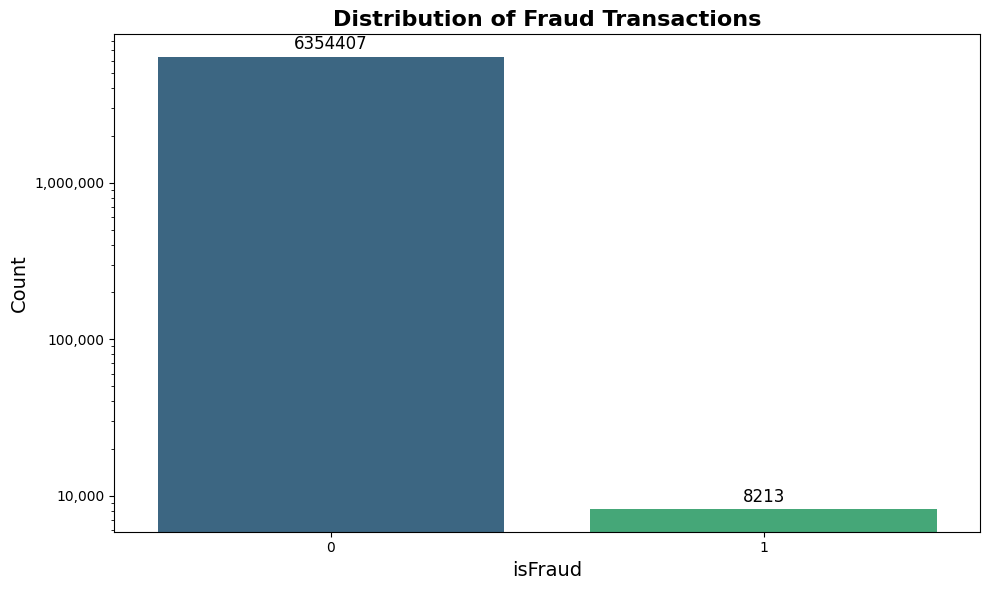

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='isFraud', data=df, palette='viridis')

ax.set_title('Distribution of Fraud Transactions', fontweight='bold', fontsize=16)
ax.set_xlabel('isFraud', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12, color='black')

ax.set_yscale('log')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

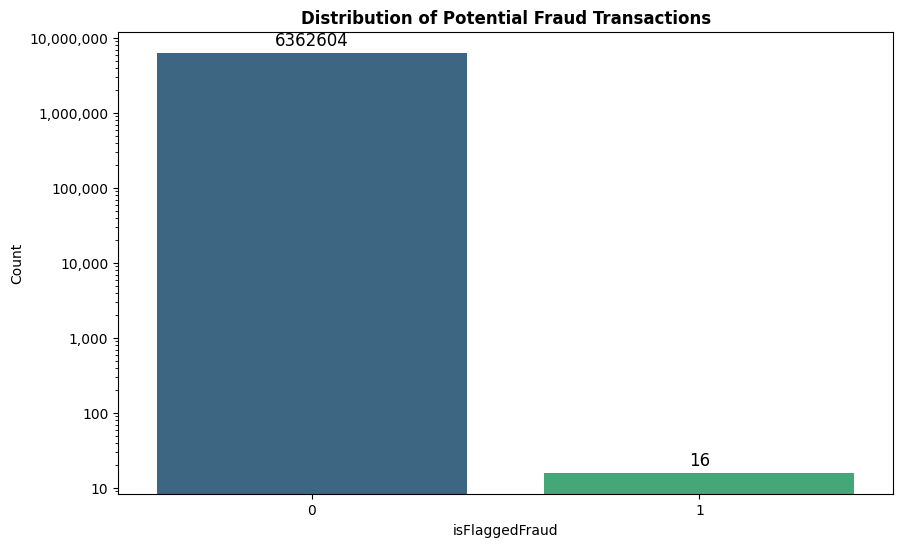

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='isFlaggedFraud', data=df, palette='viridis')

ax.set_title('Distribution of Potential Fraud Transactions', fontweight='bold')
ax.set_xlabel('isFlaggedFraud')
ax.set_ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12, color='black')

ax.set_yscale('log')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

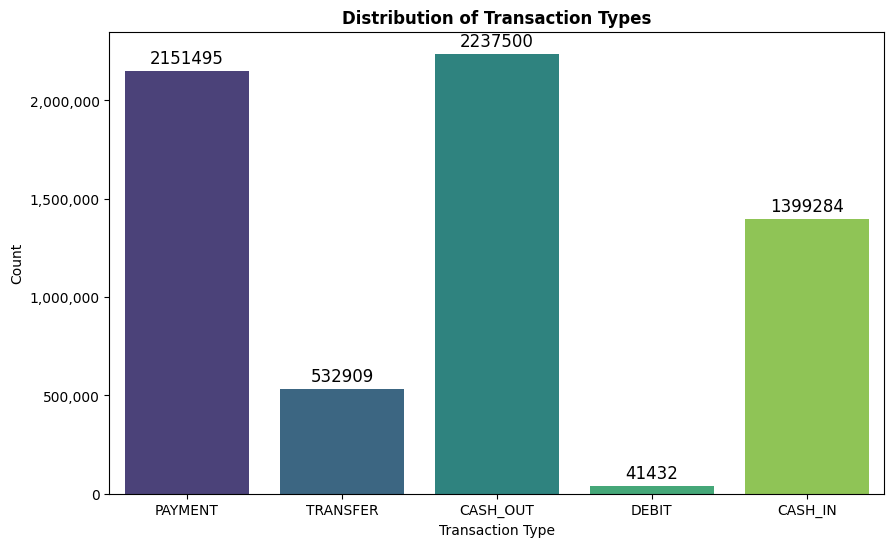

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='type', data=df, palette='viridis')

ax.set_title('Distribution of Transaction Types', fontweight='bold')
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12, color='black')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

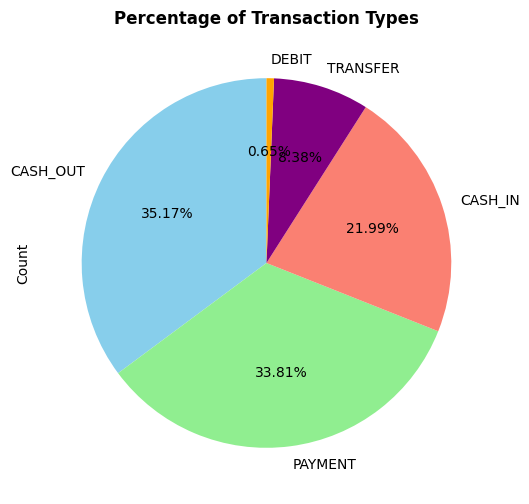

In [ ]:
type_counts = df['type'].value_counts()
type_percentages = type_counts / type_counts.sum() * 100

plt.figure(figsize=(10, 6))
plt.pie(type_percentages, labels=type_counts.index, autopct='%1.2f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'purple', 'orange'])
plt.title('Percentage of Transaction Types', fontweight='bold')
plt.ylabel('Count')

plt.show()

In [ ]:
total_amount_by_type = df.groupby('type')['amount'].sum().reset_index()
total_amount_by_type['amount'] = total_amount_by_type['amount'].apply(lambda x: f"{x / 1e9:.2f} Billions")
total_amount_by_type

,type,amount
0,CASH_IN,236.37 Billions
1,CASH_OUT,394.41 Billions
2,DEBIT,0.23 Billions
3,PAYMENT,28.09 Billions
4,TRANSFER,485.29 Billions


In [ ]:
#Calculate the original balance change
df['origBalanceChange'] = df['oldbalanceOrg'] - df['newbalanceOrig']

#Identify large changes as those in the top 5% of balance changes
large_changes = df[df['origBalanceChange'].abs() > df['origBalanceChange'].quantile(0.95)]

#Selecting and sorting the columns of interest
large_changes = large_changes[['nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'origBalanceChange']].copy()

#Sorting the results by the absolute value of the balance change in descending order for better readability
large_changes = large_changes.sort_values(by='origBalanceChange', key=abs, ascending=False)

#Formatting the balance and change columns for readability: round the values and add thousands separator
large_changes['oldbalanceOrg'] = large_changes['oldbalanceOrg'].map('${:,.2f}'.format)
large_changes['newbalanceOrig'] = large_changes['newbalanceOrig'].map('${:,.2f}'.format)
large_changes['origBalanceChange'] = large_changes['origBalanceChange'].map('${:,.2f}'.format)

large_changes.reset_index(drop=True, inplace=True)
large_changes.head()

,nameOrig,oldbalanceOrg,newbalanceOrig,origBalanceChange
0,C671111468,"$37,418,265.31","$27,418,265.31","$10,000,000.00"
1,C794290057,"$42,542,664.27","$32,542,664.27","$10,000,000.00"
2,C1421664654,"$34,892,193.09","$24,892,193.09","$10,000,000.00"
3,C524119157,"$19,228,514.10","$9,228,514.10","$10,000,000.00"
4,C1295280435,"$23,752,520.60","$13,752,520.60","$10,000,000.00"


In [ ]:
fraud_amount_stats = df.groupby('isFraud')['amount'].describe().T
fraud_amount_stats

isFraud,0,1
count,6.354407e+06,8.213000e+03
mean,1.781970e+05,1.467967e+06
std,5.962370e+05,2.404253e+06
min,1.000000e-02,0.000000e+00
25%,1.336840e+04,1.270913e+05
50%,7.468472e+04,4.414234e+05
75%,2.083648e+05,1.517771e+06
max,9.244552e+07,1.000000e+07


*   Transaction Amounts: Fraudulent transactions have significantly higher average and median amounts than non-fraudulent ones, suggesting that when fraud occurs, it's likely to involve larger sums of money.
*   Variability: The standard deviation is larger for fraudulent transactions, indicating a greater spread in the amounts, which could be due to the varied nature of fraudulent activities.
*   Distribution: The distribution of transaction amounts for both fraudulent and non-fraudulent transactions is skewed, with a long tail of higher values, as indicated by the mean being much higher than the median in both cases.



In [ ]:
flagged_fraud_transactions = df[df['isFlaggedFraud'] == 1]
flagged_fraud_transactions['amount'] = flagged_fraud_transactions['amount'].map('${:,.2f}'.format)
flagged_fraud_transactions['oldbalanceOrg'] = flagged_fraud_transactions['oldbalanceOrg'].map('${:,.2f}'.format)
flagged_fraud_transactions['newbalanceOrig'] = flagged_fraud_transactions['newbalanceOrig'].map('${:,.2f}'.format)
flagged_fraud_transactions['origBalanceChange'] = flagged_fraud_transactions['origBalanceChange'].map('${:,.2f}'.format)

flagged_fraud_transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalanceChange
2736446,212,TRANSFER,"$4,953,893.08",C728984460,"$4,953,893.08","$4,953,893.08",C639921569,0.0,0.0,1,1,$0.00
3247297,250,TRANSFER,"$1,343,002.08",C1100582606,"$1,343,002.08","$1,343,002.08",C1147517658,0.0,0.0,1,1,$0.00
3760288,279,TRANSFER,"$536,624.41",C1035541766,"$536,624.41","$536,624.41",C1100697970,0.0,0.0,1,1,$0.00
5563713,387,TRANSFER,"$4,892,193.09",C908544136,"$4,892,193.09","$4,892,193.09",C891140444,0.0,0.0,1,1,$0.00
5996407,425,TRANSFER,"$10,000,000.00",C689608084,"$19,585,040.37","$19,585,040.37",C1392803603,0.0,0.0,1,1,$0.00


In [ ]:
df['origBalanceChange'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['destBalanceChange'] = df['newbalanceDest'] - df['oldbalanceDest']

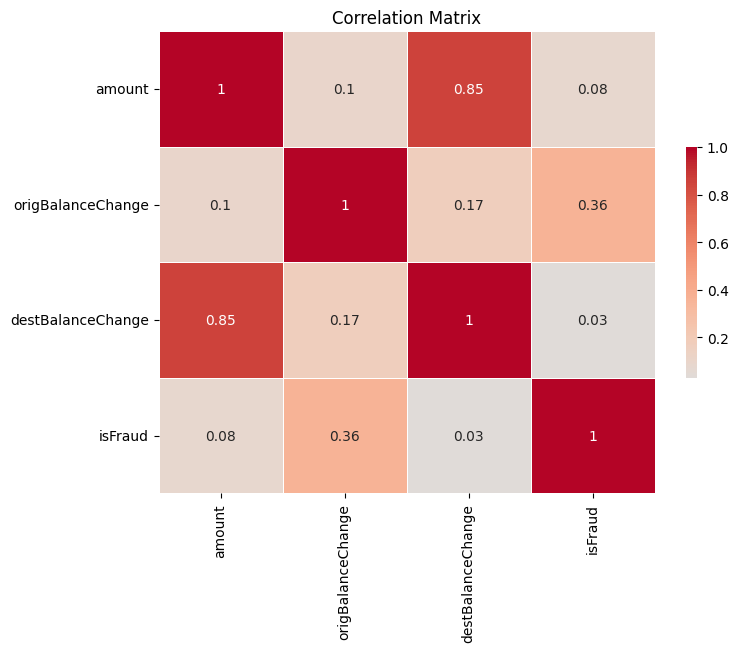

In [ ]:
balance_diff_analysis = df[['amount', 'origBalanceChange', 'destBalanceChange', 'isFraud']].corr()

balance_diff_analysis_rounded = balance_diff_analysis.round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(balance_diff_analysis_rounded, annot=True, cmap='coolwarm', center=0,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

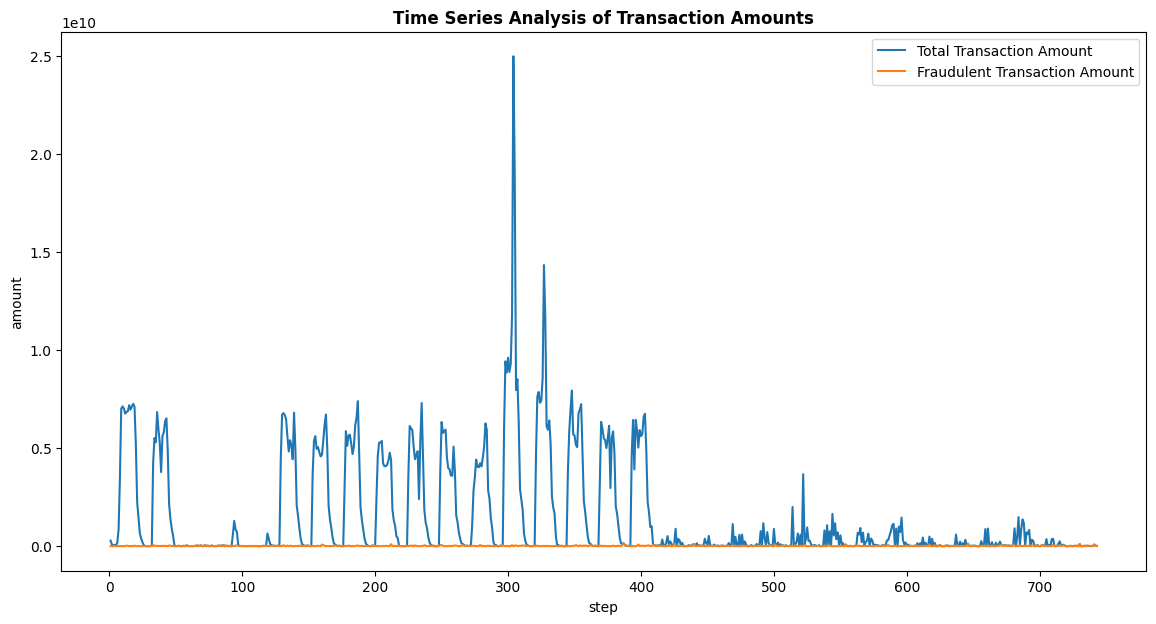

In [ ]:
time_series_data = df.groupby('step').agg(
    totalAmount=('amount', 'sum'),
    fraudAmount=('amount', lambda x: x[df.loc[x.index, 'isFraud'] == 1].sum())
).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data, x='step', y='totalAmount', label='Total Transaction Amount')
sns.lineplot(data=time_series_data, x='step', y='fraudAmount', label='Fraudulent Transaction Amount')
plt.title('Time Series Analysis of Transaction Amounts', fontweight='bold')
plt.xlabel('step')
plt.ylabel('amount')

plt.legend()
plt.show()

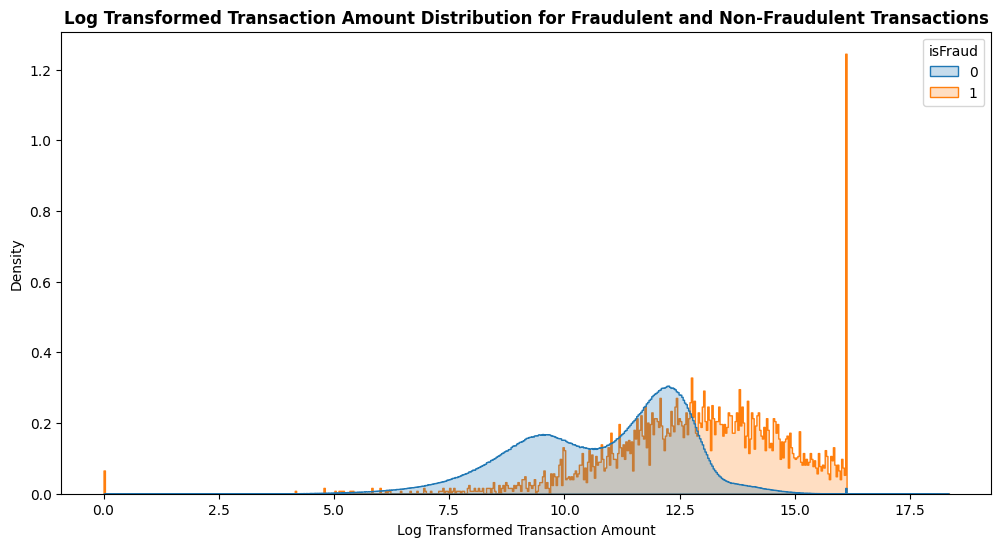

In [ ]:
df['amountLog'] = np.log(df['amount'] + 1)  # Adding 1 to avoid log(0)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='amountLog', hue='isFraud', element='step', common_norm=False, stat='density')
plt.title('Log Transformed Transaction Amount Distribution for Fraudulent and Non-Fraudulent Transactions', fontweight='bold')
plt.xlabel('Log Transformed Transaction Amount')

plt.show()

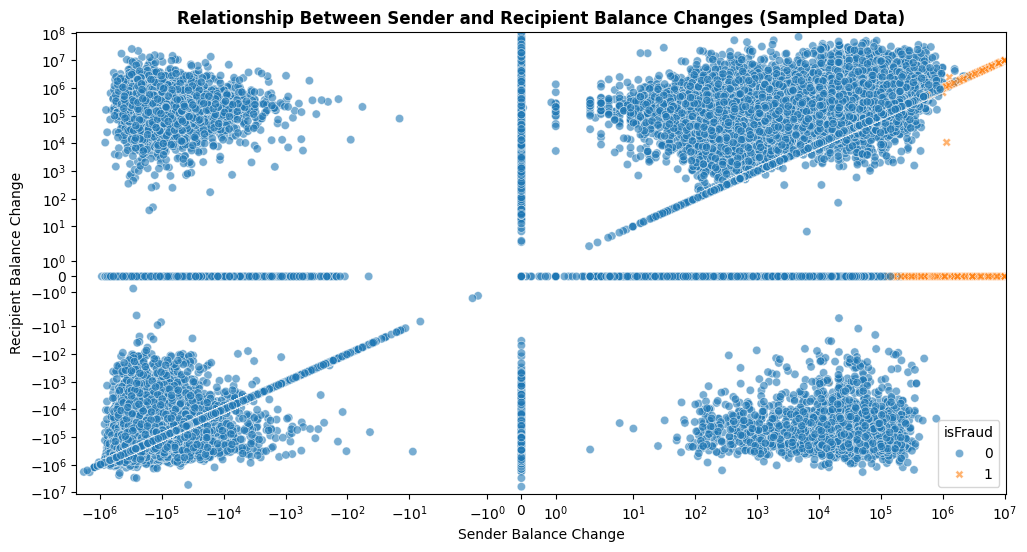

In [ ]:
df_sampled = df.sample(frac=0.1, random_state=42)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sampled, x='origBalanceChange', y='destBalanceChange', hue='isFraud', style='isFraud', alpha=0.6)
plt.title('Relationship Between Sender and Recipient Balance Changes (Sampled Data)', fontweight='bold')
plt.xlabel('Sender Balance Change')
plt.ylabel('Recipient Balance Change')
plt.xscale('symlog')
plt.yscale('symlog')

plt.show()

In [ ]:
#Count the number of occurrences of each value in the 'isFraud' column
fraud_counts = df['isFraud'].value_counts()

#Calculate the percentage of fraud and non-fraud cases
fraud_percentage = (fraud_counts[1] / len(df)) * 100
non_fraud_percentage = (fraud_counts[0] / len(df)) * 100

#Print the fraud and non-fraud percentages
print("Fraud percentage:", fraud_percentage)
print("Non-fraud percentage:", non_fraud_percentage)

Fraud percentage: 0.12908204481801522
Non-fraud percentage: 99.87091795518198


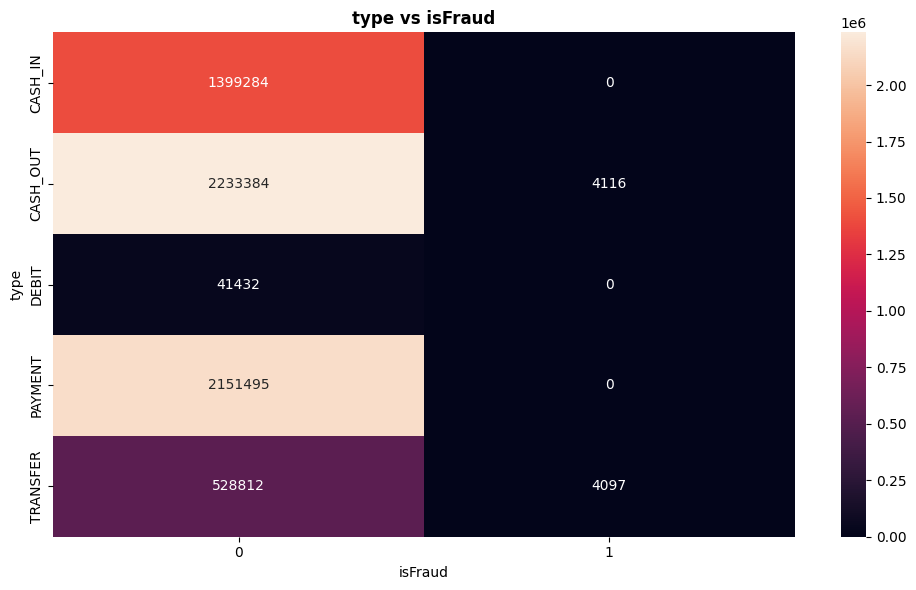

In [ ]:
plt.figure(figsize=(10, 6))
ax = pd.crosstab(df['type'], df['isFraud'])
sns.heatmap(ax, annot=True, fmt='d')
plt.title('type vs isFraud', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
#Checking for balance in target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=df['isFraud'].value_counts())])
fig.show()

**FEATURE ENGINEERING**

In [ ]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

In [ ]:
X = df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y = df[['isFraud']]

In [ ]:
#Undersampling:
undersampler = RandomUnderSampler(random_state=42)
X_res, y_res = undersampler.fit_resample(X, y)

In [ ]:
#Checking for balance in target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=y_res['isFraud'].value_counts())])
fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
#Data Standardization
col_names = ['amount','oldbalanceOrg','newbalanceOrig']

#Create copies of datasets for non-standardized models
X_train_non_standardized = X_train.copy()
X_test_non_standardized = X_test.copy()

#Standardize the data
scaler = StandardScaler().fit(X_train[col_names].values)
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_standardized[col_names] = scaler.transform(X_train[col_names].values)
X_test_standardized[col_names] = scaler.transform(X_test[col_names].values)

#Reshape y_train and y_test so it can flattens an array into a 1D array
y_train_reshaped = np.ravel(y_train)
y_test_reshaped = np.ravel(y_test)

**FUNCTION TO EVALUATE MODEL**

In [ ]:
#Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

**HYPERTUNE FUNCTION**

In [ ]:
#Hypertune for Random Forest
rf_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
#Hypertune for KNN
knn_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

**RANDOM FOREST**

Model 1: Random Forest (Not Hypertuned & Not Standardized)

In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_non_standardized, y_train_reshaped)

evaluate_model(rf1, X_test_non_standardized, y_test_reshaped)

Confusion Matrix:
[[2447   32]
 [   9 2440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928


Accuracy: 0.9916801948051948
AUC Score: 0.997374598320461


Model 2: Random Forest (Hypertuned & Not Standardized)

In [ ]:
rf2 = RandomForestClassifier()
grid_search_rf2 = GridSearchCV(estimator=rf2, param_grid=rf_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf2.fit(X_train_non_standardized, y_train_reshaped)
best_rf2 = grid_search_rf2.best_estimator_

evaluate_model(best_rf2, X_test_non_standardized, y_test_reshaped)

Confusion Matrix:
[[2436   43]
 [   9 2440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2479
           1       0.98      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928


Accuracy: 0.989448051948052
AUC Score: 0.9983440318849837


Model 3: Random Forest (Not Hypertuned & Standardized)

In [ ]:
rf3 = RandomForestClassifier()
rf3.fit(X_train_standardized, y_train_reshaped)

evaluate_model(rf3, X_test_standardized, y_test_reshaped)

Confusion Matrix:
[[2450   29]
 [   9 2440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928


Accuracy: 0.992288961038961
AUC Score: 0.9975921876057782


Model 4: Random Forest (Hypertuned & Standardized)

In [ ]:
rf4 = RandomForestClassifier()
grid_search_rf4 = GridSearchCV(estimator=rf4, param_grid=rf_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf4.fit(X_train_standardized, y_train_reshaped)
best_rf4 = grid_search_rf4.best_estimator_

evaluate_model(best_rf4, X_test_standardized, y_test_reshaped)

Confusion Matrix:
[[2437   42]
 [   9 2440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2479
           1       0.98      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928


Accuracy: 0.989650974025974
AUC Score: 0.9983770573594016


**KNN**

Model 1: KNN (Not Hypertuned & Not Standardized)

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train_non_standardized, y_train_reshaped)

evaluate_model(knn1, X_test_non_standardized, y_test_reshaped)

Confusion Matrix:
[[2430   49]
 [  12 2437]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2479
           1       0.98      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928


Accuracy: 0.9876217532467533
AUC Score: 0.9929707624898473


Model 2: KNN (Hypertuned & Not Standardized)

In [ ]:
knn2 = KNeighborsClassifier()
grid_search_knn2 = GridSearchCV(estimator=knn2, param_grid=knn_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn2.fit(X_train_non_standardized, y_train_reshaped)
best_knn2 = grid_search_knn2.best_estimator_

evaluate_model(best_knn2, X_test_non_standardized, y_test_reshaped)

Confusion Matrix:
[[2442   37]
 [  10 2439]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928


Accuracy: 0.9904626623376623
AUC Score: 0.9928470610869152


Model 3: KNN (Not Hypertuned & Standardized)

In [ ]:
knn3 = KNeighborsClassifier()
knn3.fit(X_train_standardized, y_train_reshaped)

evaluate_model(knn3, X_test_standardized, y_test_reshaped)

Confusion Matrix:
[[2433   46]
 [   9 2440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2479
           1       0.98      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928


Accuracy: 0.9888392857142857
AUC Score: 0.9940689212825874


Model 4: KNN (Hypertuned & Standardized)

In [ ]:
knn4 = KNeighborsClassifier()
grid_search_knn4 = GridSearchCV(estimator=knn4, param_grid=knn_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn4.fit(X_train_standardized, y_train_reshaped)
best_knn4 = grid_search_knn4.best_estimator_

evaluate_model(best_knn4, X_test_standardized, y_test_reshaped)

Confusion Matrix:
[[2442   37]
 [   9 2440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928


Accuracy: 0.9906655844155844
AUC Score: 0.9940908284551441
